In [1]:
import pywt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

La compresión de imágenes por wavelets es un proceso que utiliza la transformada wavelet discreta 2D para descomponer una imagen en diferentes frecuencias y direcciones. La transformada wavelet discreta 2D se realiza utilizando una familia de wavelets, como `haar`, `db1`, `sym2` o `coif5`. Los coeficientes resultantes se comprimen mediante un umbral suave y se utilizan para reconstruir la imagen comprimida.

El parámetro `wavelet_family` se utiliza para especificar la familia de wavelets a utilizar. Algunas familias populares incluyen `haar`, `db1`, `sym2` y `coif5`. El parámetro `threshold` se utiliza para establecer el valor del umbral suave utilizado para comprimir los coeficientes wavelet. Los coeficientes cuyo valor absoluto es menor que el umbral se establecen en cero, mientras que los coeficientes cuyo valor absoluto es mayor que el umbral se mantienen sin cambios. El parámetro `filter` se utiliza para especificar el tipo de filtro utilizado para la descomposición wavelet.

El proceso de compresión de imágenes por wavelets implica los siguientes pasos:

1. Cargar la imagen original.
2. Realizar una transformada wavelet discreta 2D en la imagen utilizando una familia de wavelets especificada.
3. Comprimir los coeficientes resultantes mediante un umbral suave.
4. Reconstruir la imagen comprimida utilizando los coeficientes comprimidos.
5. Visualizar la imagen original y la imagen comprimida.

La compresión de imágenes por wavelets puede ser utilizada para reducir el tamaño de las imágenes digitales sin perder demasiada información visual. Sin embargo, es importante tener en cuenta que la calidad de la imagen comprimida depende del valor del umbral suave utilizado y de la familia de wavelets seleccionada.

(1) Uso de la Transformada de Wavelet para la compresión de imágenes .... http://lcr.uns.edu.ar/fvc/NotasDeAplicacion/FVC-Gonzalo%20D%20Acosta.pdf.
(2) Compresión de imágenes con Wavelets y Multiwavelets - Redalyc. https://www.redalyc.org/articulo.oa?id=498850160008.
(3) Tratamiento de imágenes digitales mediante wavelets. http://personales.upv.es/aperis/wavelets/imagenes/indice.htm.
(4) Compresión de imágenes Haar Wavelet - Studocu. https://www.studocu.com/es-mx/document/universidad-autonoma-de-coahuila/algebra-lineal/compresion-de-imagenes-haar-wavelet/3068260.
(5) Compresión de Imágenes Fijas utilizando la Trasformada Wavelet - CORE. https://core.ac.uk/download/pdf/15780665.pdf.
(6) Single-level 2-D discrete wavelet transform - MATLAB dwt2 - MathWorks. https://www.mathworks.com/help/wavelet/ref/dwt2.html.
(7) Filters (Wavelet): Thresholding - MIPAV - National Institutes of Health. https://mipav.cit.nih.gov/pubwiki/index.php/Filters_%28Wavelet%29:_Thresholding.
(8) python - How to find threshold value and which wavelet family to use .... https://stackoverflow.com/questions/59886413/how-to-find-threshold-value-and-which-wavelet-family-to-use-for-low-pass-filter.

In [2]:
def compress_image(image_path, wavelet_family):
    # Load the image
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Decompose the image using the specified wavelet family
    coeffs = pywt.dwt2(image_array, wavelet_family)
    # Discard some of the coefficients to compress the image
    compressed_coeffs = [pywt.threshold(i, value=5, mode='garrote') for i in coeffs] #th dfault value = 0.1, mode dfault value = soft
    # Reconstruct the compressed image
    compressed_image = pywt.idwt2(compressed_coeffs, wavelet_family)
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(np.uint8(compressed_image))
    return compressed_image

# Example usage:
image_path = 'data/Lena.png'
wavelet_family = 'haar'
compressed_image = compress_image(image_path, wavelet_family)
compressed_image.show()
compressed_image.save("./data/Lena_comp_haar_th_5_mode_garrote_filter_LoD.png","PNG")

Haar wavelet

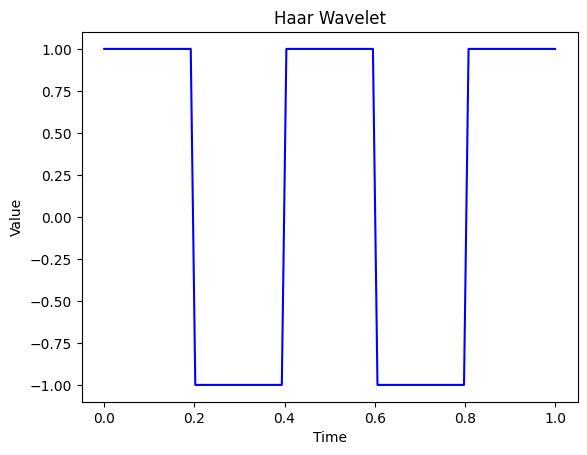

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(0, 1, 100)

# Create an empty wavelet vector
haar_wavelet = np.zeros_like(x)

# Define the number of alternating intervals
num_intervals = 5

# Calculate the length of each alternating interval
interval_length = len(x) // num_intervals

# Fill the wavelet vector with +1 and -1 values in alternating intervals
for i in range(num_intervals):
    start = i * interval_length
    end = (i + 1) * interval_length
    if i % 2 == 0:
        haar_wavelet[start:end] = 1
    else:
        haar_wavelet[start:end] = -1

# Plot the Haar wavelet
plt.plot(x, haar_wavelet, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Haar Wavelet')
plt.show()

Mexican Hat (Ricker) Wavelet

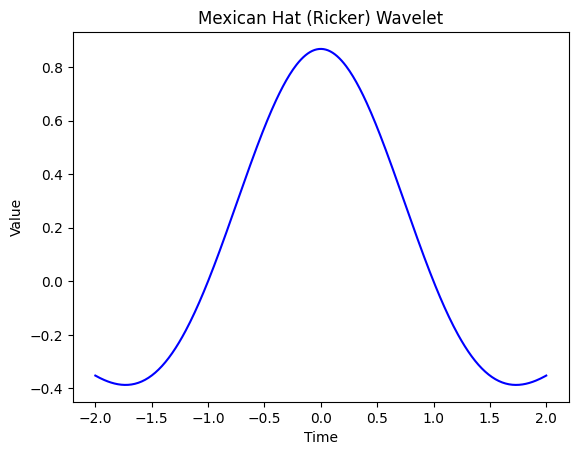

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define the Mexican Hat (Ricker) wavelet function
def mexican_hat_wavelet(x):
    sigma = 1.0  # Width of the Gaussian component
    return (2 / (np.sqrt(3 * sigma) * (np.pi ** 0.25)) *
            (1 - (x ** 2) / (sigma ** 2)) * np.exp(-x ** 2 / (2 * sigma ** 2)))

# Compute the Mexican Hat wavelet for the time vector
mexican_hat = mexican_hat_wavelet(x)

# Plot the Mexican Hat (Ricker) wavelet
plt.plot(x, mexican_hat, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mexican Hat (Ricker) Wavelet')
plt.show()



Symlet Wavelet

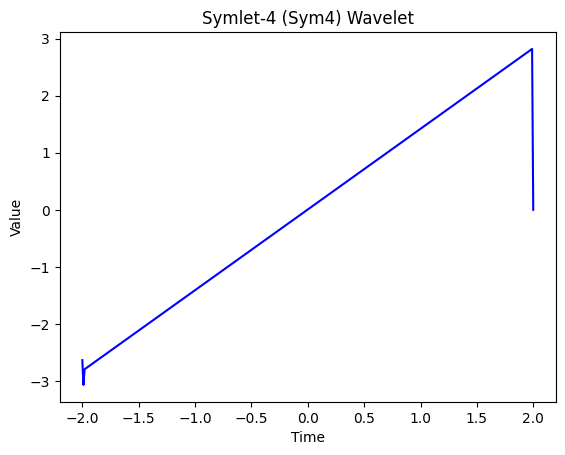

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define the Symlet-4 (Sym4) wavelet coefficients
sym4_coefficients = [0.48296, 0.8365, 0.22414, -0.12940]

# Function to compute the Symlet-4 wavelet
def compute_sym4_wavelet(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)-1):
        sum_val = 0
        for j in range(n):
            k = i - j + 1
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Compute the Symlet-4 wavelet for the time vector
sym4_wavelet = compute_sym4_wavelet(x, sym4_coefficients)

# Plot the Symlet-4 (Sym4) wavelet
plt.plot(x, sym4_wavelet, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Symlet-4 (Sym4) Wavelet')
plt.show()


Gabor Wavelet

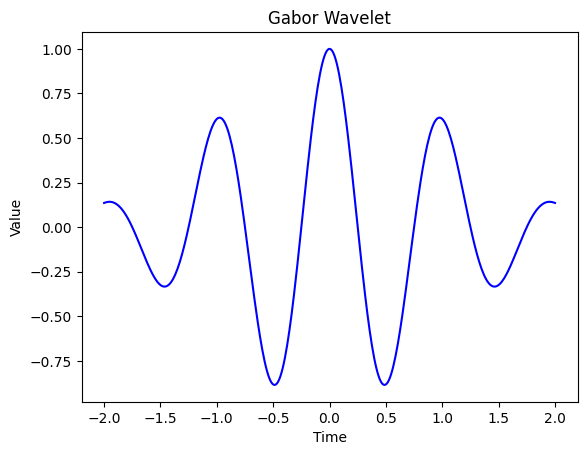

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define Gabor wavelet parameters
sigma = 1.0  # Width of the Gaussian component
f = 1.0  # Frequency of the sinusoidal component
phi = 0.0  # Phase of the sinusoidal component

# Function to compute the Gabor wavelet
def gabor_wavelet(x, sigma, f, phi):
    gauss_part = np.exp(-x**2 / (2 * sigma**2))
    sinus_part = np.cos(2 * np.pi * f * x + phi)
    return gauss_part * sinus_part

# Compute the Gabor wavelet for the time vector
gabor_wavelet_values = gabor_wavelet(x, sigma, f, phi)

# Plot the Gabor wavelet
plt.plot(x, gabor_wavelet_values, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gabor Wavelet')
plt.show()


Biorthogonal Wavelet

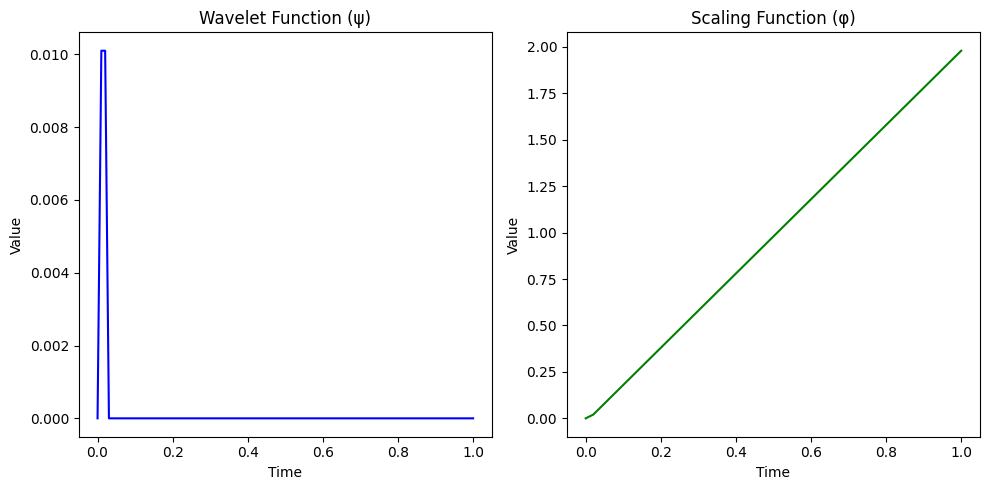

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(0, 1, 100)

# Define the coefficients for the wavelet (ψ) and scaling (φ) functions
wavelet_coefficients = [1, -1, -1, 1]
scaling_coefficients = [1, 1]

# Function to compute the wavelet function (ψ)
def compute_wavelet(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)):
        sum_val = 0
        for j in range(n):
            k = i - j
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Function to compute the scaling function (φ)
def compute_scaling(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)):
        sum_val = 0
        for j in range(n):
            k = i - 2 * j
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Compute the wavelet (ψ) and scaling (φ) functions for the time vector
wavelet_function = compute_wavelet(x, wavelet_coefficients)
scaling_function = compute_scaling(x, scaling_coefficients)

# Plot the wavelet (ψ) and scaling (φ) functions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, wavelet_function, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Wavelet Function (ψ)')

plt.subplot(1, 2, 2)
plt.plot(x, scaling_function, color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Scaling Function (φ)')

plt.tight_layout()
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


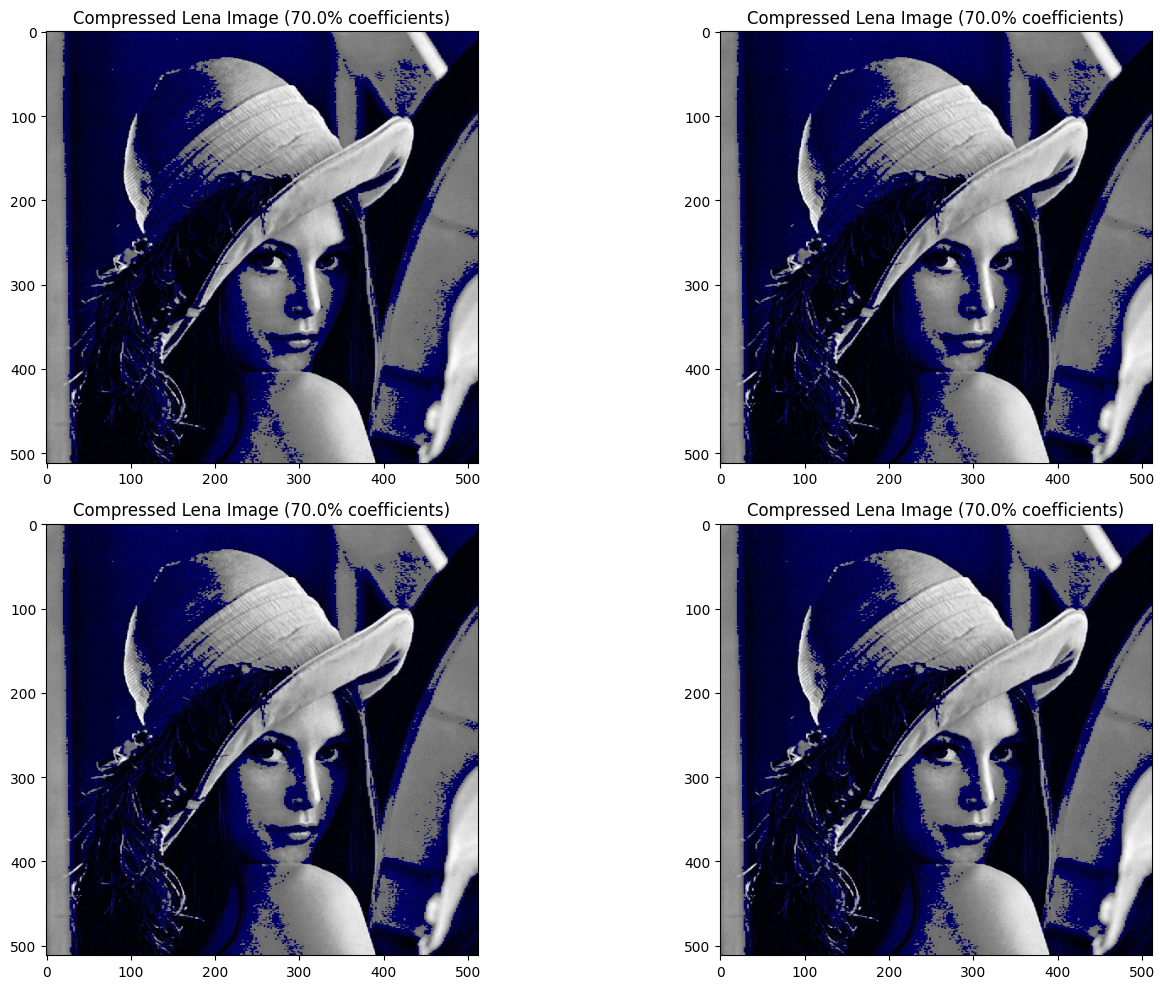

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

# Load the Lena image
lena_image = mpimg.imread('./data/Lena.png')  # Replace 'lena.png' with the path to your image

# Define the compression ratio (e.g., keep only 50% of coefficients)
compression_ratio = 0.7

# Convert the Lena image to grayscale if it's in color
if lena_image.shape[-1] == 3:
    lena_image = np.mean(lena_image, axis=-1)

# Perform the 2D Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt2(lena_image, 'haar')

# Extract the LL (low-frequency) coefficient
cA, (cH, cV, cD) = coeffs
compressed_cA = cA
compressed_cH = cH
compressed_cV = cV
compressed_cD = cD

# Calculate the threshold for compression
thresholdA = np.percentile(np.abs(compressed_cA), (1 - compression_ratio) * 100)
thresholdH = np.percentile(np.abs(compressed_cH), (1 - compression_ratio) * 100)
thresholdV = np.percentile(np.abs(compressed_cV), (1 - compression_ratio) * 100)
thresholdD = np.percentile(np.abs(compressed_cD), (1 - compression_ratio) * 100)

# Set coefficients below the threshold to zero
compressed_cA[np.abs(compressed_cA) < thresholdA] = 0
compressed_cH[np.abs(compressed_cH) < thresholdH] = 0
compressed_cV[np.abs(compressed_cV) < thresholdV] = 0
compressed_cD[np.abs(compressed_cD) < thresholdD] = 0

# Reconstruct the compressed image
compressed_image_cA = pywt.idwt2((compressed_cA, (cH, cV, cD)), 'haar')
compressed_image_cH = pywt.idwt2((cA, (compressed_cH, cV, cD)), 'haar')
compressed_image_cV = pywt.idwt2((cA, (cH, compressed_cV, cD)), 'haar')
compressed_image_cD = pywt.idwt2((cA, (cH, cV, compressed_cD)), 'haar')

# Plot the original and compressed images
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(compressed_image_cA, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 2)
plt.imshow(compressed_image_cH, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 3)
plt.imshow(compressed_image_cV, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 4)
plt.imshow(compressed_image_cD, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.tight_layout()



In [9]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


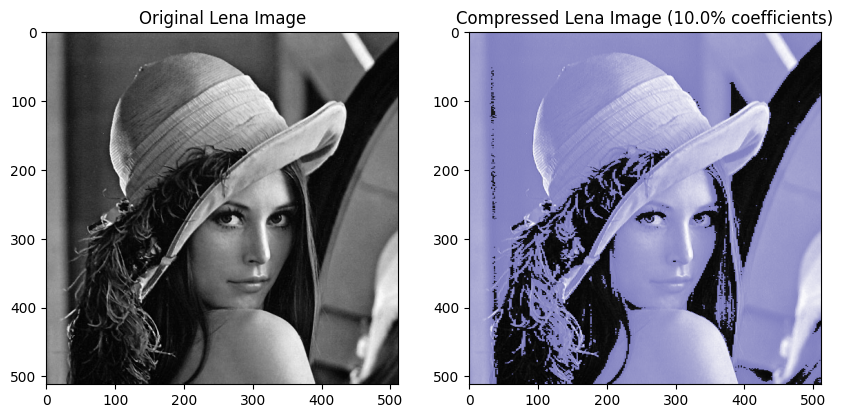

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

# Load the Lena image
lena_image = mpimg.imread('./data/Lena.png')  # Replace 'lena.png' with the path to your image

# Define the compression ratio (e.g., keep only 50% of coefficients)
compression_ratio = 0.1

# Convert the Lena image to grayscale if it's in color
if lena_image.shape[-1] == 3:
    lena_image = np.mean(lena_image, axis=-1)

# Perform the 2D Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt2(lena_image, 'haar')

# Extract the LL (low-frequency) coefficient
cA, (cH, cV, cD) = coeffs
compressed_cV = cV

# Calculate the threshold for compression
threshold = np.percentile(np.abs(compressed_cV), (1 - compression_ratio) * 100)

# Set coefficients below the threshold to zero
compressed_cV[np.abs(compressed_cV) < threshold] = 0

# Reconstruct the compressed image
compressed_image = pywt.idwt2((cA, (cH, compressed_cV, cD)), 'haar')

# Plot the original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_image, cmap='gray')
plt.title('Original Lena Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')
plt.show()

In [11]:
def compress_image(image_path, wavelet_family):
    # Load the image
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Decompose the image using the specified wavelet family
    coeffs = pywt.dwt2(image_array, wavelet_family)
    # Discard some of the coefficients to compress the image
    compressed_coeffs = [pywt.threshold(i, value = 5, mode='garrote') for i in coeffs] #th dfault value = 0.1, mode dfault value = soft
    # Reconstruct the compressed image
    compressed_image = pywt.idwt2(compressed_coeffs, wavelet_family)
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(np.uint8(compressed_image))
    return compressed_image

# Example usage:
image_path = 'data/Lena.png'
wavelet_family = 'haar'
compressed_image = compress_image(image_path, wavelet_family)
compressed_image.show()
compressed_image.save("./data/Lena_comp_haar_th_5_mode_garrote_filter_LoD.png","PNG")

Filtros unidimensionales con wavelets discretas

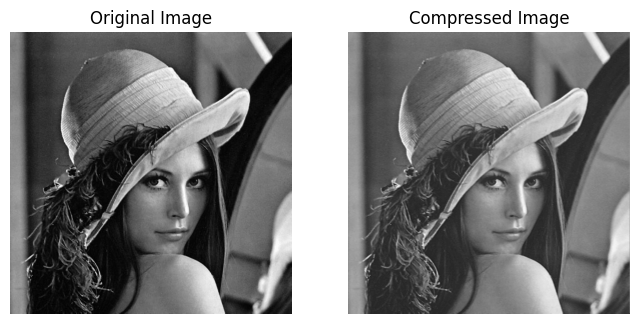

In [12]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

def daubechies_wavelet(data):

    # Coeficientes de Daubechies
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')

    return cA, cD

def inverse_daubechies_wavelet(cA, cD):

    # Coeficientes inversos
    g0 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    g1 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes inversos
    data_approx = np.convolve(cA, g0, mode='same')
    data_detail = np.convolve(cD, g1, mode='same')

    return data_approx + data_detail

def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    cA = np.convolve(data, h0, mode='same')
    cD = np.convolve(data, h1, mode='same')
    
    return cA, cD

def inverse_haar_wavelet(cA, cD):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    data_approx = np.convolve(cA, h0, mode='same')
    data_detail = np.convolve(cD, h1, mode='same')
    
    return data_approx + data_detail

def coiflet_wavelet(data):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with wavelet coefficients
    cA = np.convolve(data, [h0, h1, h2, h3], mode='same')
    cD = np.convolve(data, [-h3, h2, -h1, h0], mode='same')

    return cA, cD

def inverse_coiflet_wavelet(cA, cD):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with inverse wavelet coefficients
    data_approx = np.convolve(cA, [h0, h1, h2, h3], mode='same')
    data_detail = np.convolve(cD, [-h3, h2, -h1, h0], mode='same')

    return data_approx + data_detail

def wavelet_compress(image_path, compression_ratio = 0.1, wavelet_family = 'daubechies_1'):

    # Carga de la imagen en escala de grises
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convolución con la wavelet
    if wavelet_family == 'daubechies_1':
        flattened_image = original_image.flatten()
        cA, cD = daubechies_wavelet(flattened_image)

    elif wavelet_family == 'haar':
        flattened_image = original_image.flatten()
        cA, cD = haar_wavelet(flattened_image)

    elif wavelet_family == 'coiflet_1':
        flattened_image = original_image.flatten()
        cA, cD = coiflet_wavelet(flattened_image)

    else:
        raise Exception(f'La familia de wavelets {wavelet_family} no está implementada.')
    
    # Compresión: eliminamos coeficientes por debajo del umbral
    threshold = compression_ratio * np.max(np.abs(cD))
    cD_thresholded = np.where(np.abs(cD) < threshold, 0, cD)

    # Transformada inversa
    if wavelet_family == 'daubechies_1':
        compressed_image_flat = inverse_daubechies_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'haar':
        compressed_image_flat = inverse_haar_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'coiflet_1':
        compressed_image_flat = inverse_coiflet_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)
    
    # Guaradado de la imagen comprimida
    output_image_path = f'./data/Lena_{wavelet_family}.png'
    cv2.imwrite(output_image_path, compressed_image.astype(np.uint8))

    # Representación
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

    return compressed_image

# Example usage
input_image_path = './data/Lena.png'
wavelet_family = 'coiflet_1'
compression_ratio = 1  # You can adjust this value based on your desired compression ratio

compressed_image = wavelet_compress(input_image_path, compression_ratio, wavelet_family)


In [13]:
def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')
    return cA, cD

def inverse_haar_wavelet(cA = [], cD = []):

    if not(len(cA) > 0 or len(cD) > 0):
        raise Exception("Eres inútil.")
    
    if len(cA) > 0:
        h0 = np.array([0.5, 0.5])
        data_approx = np.convolve(cA, h0, mode = 'same')
    else:
        data_approx = 0
        
    if len(cD) > 0:
        h1 = np.array([-0.5, 0.5])
        data_detail = np.convolve(cD, h1, mode = 'same')
    else:
        data_detail = 0
    
    return data_approx + data_detail

image_path = './data/Lena.png'
n_niveles = 100
cA = []
cD = []
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
flattened_image = original_image.flatten()
cA_0, cD_0 = haar_wavelet(flattened_image)
cA.append(cA_0)
cD.append(cD_0)
for i in range(1, n_niveles):
    # image_cAi = inverse_haar_wavelet(cA[i - 1])
    # cAi, cDi = haar_wavelet(image_cAi)
    cAi, cDi = haar_wavelet(cA[i - 1])
    cA.append(cAi)
    cD.append(cDi)


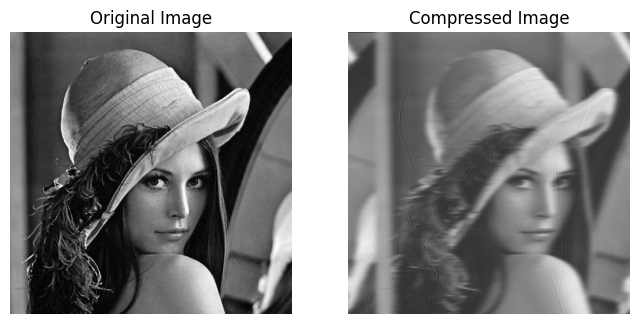

In [14]:

compressed_image_flat = inverse_haar_wavelet(cA = cA[-1], cD = cD[0])
compressed_image = compressed_image_flat.reshape(original_image.shape)

plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap = 'gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()
# Buscar algoritmo de mallat

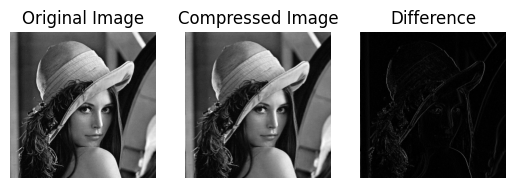

Índice de Similitud Estructural (SSIM): 0.7848317931724772
(512, 512)
(512, 512)
Error Cuadrático Medio (MSE): 254.84636306762695


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def daubechies_wavelet(data):

    # Coeficientes de Daubechies
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')

    return cA, cD

def convolve(signal, kernel):
    # Realiza la convolución de la señal con el kernel
    return np.convolve(signal, kernel, mode='same')

def dwt_mallat(signal, low_pass_filter, high_pass_filter, levels=1):
    approximations = []
    details = []

    # Realiza la descomposición en N niveles
    for _ in range(levels):
        # Filtrado de paso bajo (suavizado)
        approx = convolve(signal, low_pass_filter)
        # Filtrado de paso alto (detalles)
        detail = convolve(signal, high_pass_filter)

        # Submuestreo
        approximations.append(approx[::2])
        details.append(detail[::2])

        # Actualiza la señal para la siguiente iteración
        signal = approximations[-1]

    # Agrega la última aproximación
    approximations.append(signal)

    return approximations, details

def idwt_mallat(approximations, details, low_pass_filter, high_pass_filter):
    # Realiza la reconstrucción
    reconstructed_signal = approximations[-1]

    for approx, detail in zip(reversed(approximations[:-1]), reversed(details)):
        # Upsample y convolución con el filtro de paso bajo
        upsampled_approx = np.zeros(2 * len(approx))
        upsampled_approx[::2] = approx
        upsampled_approx = convolve(upsampled_approx, low_pass_filter)

        # Upsample y convolución con el filtro de paso alto
        upsampled_detail = np.zeros(2 * len(detail))
        upsampled_detail[::2] = detail
        upsampled_detail = convolve(upsampled_detail, high_pass_filter)

        # Suma las dos contribuciones para la reconstrucción
        reconstructed_signal = upsampled_approx + upsampled_detail

    return reconstructed_signal

# Ejemplo de uso
image_path = "./data/Lena.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
flattened_image = original_image.flatten()
low_pass_filter = np.array([0.7071067811865476, 0.7071067811865476])  # Filtro de paso bajo para la wavelet Haar
high_pass_filter = np.array([-0.7071067811865476, 0.7071067811865476])  # Filtro de paso alto para la wavelet Haar
levels_of_decomposition = 2

# Realiza la DWT de Mallat
approximations, details = dwt_mallat(flattened_image, low_pass_filter, high_pass_filter, levels=levels_of_decomposition)
# print("Approximations:", approximations)
# print("Details:", details)
compression_ratio = 0.8
threshold = compression_ratio * np.max(np.abs(details[-1]))
details[-1] = np.where(np.abs(details[-1]) < threshold, 0, details[-1])

# Realiza la IDWT de Mallat para reconstruir la señal original
compressed_image_flat = idwt_mallat(approximations, details, low_pass_filter, high_pass_filter)
compressed_image = compressed_image_flat.reshape(original_image.shape)
difference = np.abs(original_image - compressed_image)
# print("Reconstructed Signal:", reconstructed_signal)

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.show()

from skimage.metrics import structural_similarity as ssim

# Calcular el SSIM
data_range = original_image.max() - original_image.min()
ssim_index, _ = ssim(original_image, compressed_image, full=True, data_range=data_range)

# Imprimir el resultado
print(f'Índice de Similitud Estructural (SSIM): {ssim_index}')

# Puedes interpretar el valor de SSIM. Un SSIM de 1 indica que las imágenes son idénticas.
# Valores cercanos a 1 indican alta similitud estructural.
# Cuanto más bajo es el SSIM, más diferencias hay entre las imágenes.

print(original_image.shape)
print(compressed_image.shape)

# Calcular el Error Cuadrático Medio (MSE)
mse = np.sum((original_image - compressed_image) ** 2) / float(original_image.shape[0] * original_image.shape[1])

# Imprimir el resultado
print(f'Error Cuadrático Medio (MSE): {mse}')

In [ ]:
from PIL import Image
import numpy as np

def convolve2D(image, kernel):
    # Convolución 2D de la imagen con el kernel
    return np.convolve(image.flatten(), kernel.flatten(), mode='same').reshape(image.shape)

def dwt_mallat_2D(image, low_pass_filter, high_pass_filter, levels=1):
    approximations = []
    details_horizontal = []
    details_vertical = []
    details_diagonal = []

    # Realiza la descomposición en N niveles
    for _ in range(levels):
        # Filtros de paso bajo y alto para las direcciones horizontal, vertical y diagonal
        approx = convolve2D(image, low_pass_filter)
        detail_h = convolve2D(image, high_pass_filter[0])
        detail_v = convolve2D(image, high_pass_filter[1])
        detail_d = convolve2D(image, high_pass_filter[2])

        # Submuestreo
        approximations.append(approx[::2, ::2])
        details_horizontal.append(detail_h[::2, ::2])
        details_vertical.append(detail_v[::2, ::2])
        details_diagonal.append(detail_d[::2, ::2])

        # Actualiza la imagen para la siguiente iteración
        image = approximations[-1]

    # Agrega la última aproximación
    approximations.append(image)

    return approximations, details_horizontal, details_vertical, details_diagonal

def idwt_mallat_2D(approximations, details_horizontal, details_vertical, details_diagonal, low_pass_filter, high_pass_filter):
    # Realiza la reconstrucción
    reconstructed_image = approximations[-1]

    for approx, detail_h, detail_v, detail_d in zip(
        reversed(approximations[:-1]),
        reversed(details_horizontal),
        reversed(details_vertical),
        reversed(details_diagonal)
    ):
        # Upsample y convolución con los filtros
        upsampled_approx = convolve2D(np.zeros_like(approximations[0]), low_pass_filter)
        upsampled_approx[::2, ::2] = approx
        upsampled_approx = convolve2D(upsampled_approx, low_pass_filter)

        upsampled_detail_h = convolve2D(np.zeros_like(detail_h), high_pass_filter[0])
        upsampled_detail_h[::2, ::2] = detail_h
        upsampled_detail_h = convolve2D(upsampled_detail_h, high_pass_filter[0])

        upsampled_detail_v = convolve2D(np.zeros_like(detail_v), high_pass_filter[1])
        upsampled_detail_v[::2, ::2] = detail_v
        upsampled_detail_v = convolve2D(upsampled_detail_v, high_pass_filter[1])

        upsampled_detail_d = convolve2D(np.zeros_like(detail_d), high_pass_filter[2])
        upsampled_detail_d[::2, ::2] = detail_d
        upsampled_detail_d = convolve2D(upsampled_detail_d, high_pass_filter[2])

        # Suma las contribuciones para la reconstrucción
        reconstructed_image = upsampled_approx + upsampled_detail_h + upsampled_detail_v + upsampled_detail_d

    return reconstructed_image

# Ejemplo de compresión y reconstrucción de una imagen
# (Reemplaza 'input_image.jpg' con la ruta de tu imagen)
image_path = './data/Lena.png'
output_path = './data/Lena_compressed'
input_image = np.array(Image.open(image_path).convert('L'))  # Convertir a escala de grises

# Filtros para la wavelet de Haar 2D
low_pass_filter = np.array([[0.7071067811865476, 0.7071067811865476],
                            [0.7071067811865476, 0.7071067811865476]])

high_pass_filter_horizontal = np.array([[-0.7071067811865476, 0.7071067811865476],
                                       [-0.7071067811865476, 0.7071067811865476]])

high_pass_filter_vertical = np.array([[-0.7071067811865476, -0.7071067811865476],
                                     [0.7071067811865476, 0.7071067811865476]])

high_pass_filter_diagonal = np.array([[0.7071067811865476, -0.7071067811865476],
                                      [-0.7071067811865476, 0.7071067811865476]])

# Niveles de descomposición
levels_of_decomposition = 1

# Realiza la DWT de Mallat
approx, detail_h, detail_v, detail_d = dwt_mallat_2D(input_image, low_pass_filter,
                                                      [high_pass_filter_horizontal, high_pass_filter_vertical, high_pass_filter_diagonal],
                                                      levels=levels_of_decomposition)

# Realiza la IDWT de Mallat para reconstruir la imagen original
reconstructed_image = idwt_mallat_2D(approx, detail_h, detail_v, detail_d, low_pass_filter,
                                     [high_pass_filter_horizontal, high_pass_filter_vertical, high_pass_filter_diagonal])

# Guarda la imagen reconstruida (comprimida)
Image.fromarray(reconstructed_image.astype(np.uint8)).save(output_path)


ValueError: could not broadcast input array from shape (256,256) into shape (128,128)

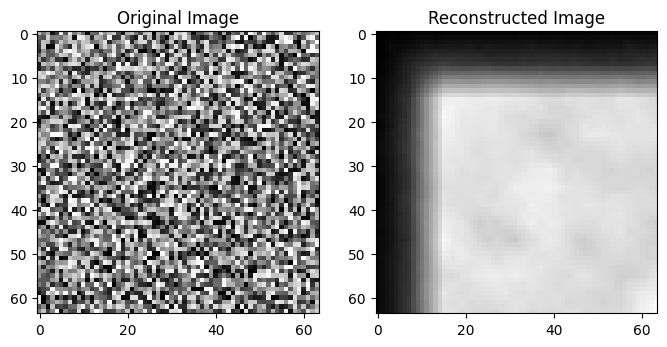

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolve(image, filter):
    # Perform 1D convolution along each row
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        result[i, :] = np.convolve(image[i, :], filter, mode='same')

    # Perform 1D convolution along each column
    for j in range(image.shape[1]):
        result[:, j] = np.convolve(result[:, j], filter, mode='same')

    return result

def wavelet_transform(image, filter):
    # Convolve the image with the filter
    result = convolve(image, filter)

    # Downsample by a factor of 2
    result = result[::2, ::2]

    return result

def inverse_wavelet_transform(approx_coeff, detail_coeff, filter):
    # Upsample by a factor of 2
    approx_result = approx_coeff.repeat(2, axis=0).repeat(2, axis=1)
    detail_result = detail_coeff.repeat(2, axis=0).repeat(2, axis=1)

    # Convolve with the filter
    approx_result = convolve(approx_result, filter[::-1])
    detail_result = convolve(detail_result, filter[::-1])

    # Combine the results
    result = approx_result + detail_result

    return result

def mallat_algorithm(image, filter, levels):
    coefficients = []

    for _ in range(levels):
        # Decompose the image using wavelet transform
        image = wavelet_transform(image, filter)
        
        # Store the approximation and detail coefficients at each level
        coefficients.append(image)

    # The last level contains the final approximation coefficients
    coefficients.append(image)

    return coefficients

def inverse_mallat_algorithm(coefficients, filter):
    approx_coeff = coefficients[-1]

    for i in range(len(coefficients) - 2, -1, -1):
        # Upsample and reconstruct the image
        detail_coeff = coefficients[i]
        approx_coeff = inverse_wavelet_transform(approx_coeff, detail_coeff, filter)

    return approx_coeff

# Example usage:
# Assuming 'image' is your input image (numpy array)
# You can choose different wavelet filters such as Haar, Daubechies, etc.

# Example usage with Haar wavelet and 3 decomposition levels
haar_filter = np.array([1, 1]) / np.sqrt(2)
image = np.random.rand(64, 64)  # Replace this with your actual image data

coefficients = mallat_algorithm(image, haar_filter, levels=3)
reconstructed_image = inverse_mallat_algorithm(coefficients, haar_filter)

# Now 'reconstructed_image' contains the reconstructed image after compression and decompression

# Plot the original and reconstructed images for comparison
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')

plt.show()


# Nivel de descomposición máximo

La función dwtn_max_level de la librería pywavelets devuelve el nivel máximo de descomposción en que podemos comprimir la imagen (por ejemplo utilizando las función wavedec2) con una determinada familia de wavelets. Esta función es en realidad una generalización para señales n-dimensionales de la función dwt_max_level, la cuál determina el nivel máximo para la descomposición de una señal unidimensional. La función dwt_max_level calcula el nivel máximo de descomposición como el nivel donde hay al menos un coeficiente que no se ve afectado por los efectos de borde. Los efectos de borde son problemas que pueden surgir cuando se aplica una transformada wavelet en los bordes de una señal (en este caso la imagen) debido a la naturaleza finita de la señal y al hecho que las funciones wavelet requieren de un número mínimo de muestras para calcularse adecuadamente. También se puede interpretar este nivel máximo como si la descomposición parase cuando la señal se vuelve más pequeña que la FIR (finite impulse response) del filtro asociado a la wavelet. La expresión analítica de este nivel viene dada por:

max_level = log_2[data_len/(filter_len - 1)] donde data_len y filter_len son los tamaños de la señal original y el filtro respectivamente,

En el caso de señales n-dimensionales, el nivel máximo de descomposición es el mínimo de los niveles máximos calcukados para todos los n ejes.

https://pywavelets.readthedocs.io/en/latest/

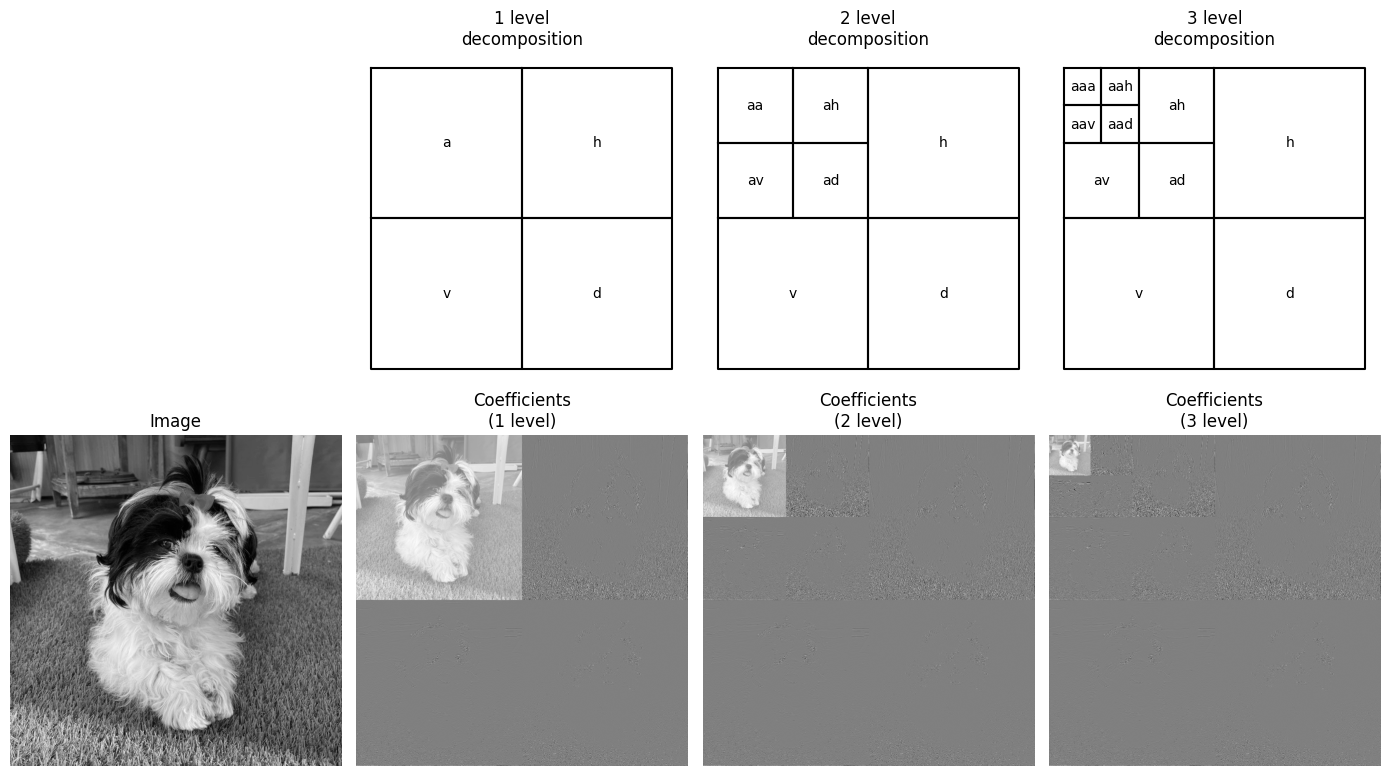

In [ ]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
import cv2
from PIL import Image

image_path = 'data/Lola.jpg'
image = Image.open(image_path).convert('L')
x = np.array(image)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

# Métodos de comparación de la imagen original y la comprimida

Una vez reaizada la compresión, resulta siempre interesante comparar la imagen comprimida con la imagen original, ya que típicamente queremos mantener un equilbrio entre la compresión de la imagen y su calidad, de manera que se parezca lo máximo posible a la imagen original.

Como ya hemos comentado anteriormente, para comprimir la imagen por el método de las wavelet, dividimos la información de la imagen en subseñales de aproximación y detalle aplicando a la imagen una (o varias) transformaciones wavelet. Los coeficientes de aproximación proporcionan la teendencia general de los píxeles mientras que los coeficientes de detalle proporcionan los cambios o detalles en las direcciones horizontal, vertical y diagonal de la imagen. Para comprimir la imagen establecemos un umbral o "threshold", que no es más que un valor de los coeficientes de detalle por debajo del cual los coeficientes son aproximados a cero. Cuanto mayor sea el número de ceros, mayor podrá ser la compresión alcanzada. Sin embargo, al hacer cero estos coeficientes se pierde cierta cantidad de información de la imagen original. Cuantos más coeficientes se hagan cero mayor será la compresión pero será mayor la pérdida de información de la imagen original, por lo que se debe buscar un balance entre ambos. Por ello, para cuantificar la compresión de la imagen y su semejanza con la imagen original podemos emplear diversos métodos:

+ **Ratio de compresión**

El ratio de compresión es el ratio entre el tamaño de la imagen comprimida y la original. Esre ratio es un indicador cuánto se ha comprimido una imagen en particular. Generalmente, cuanto mayor es el ratio de compresión peor es la calidad de la imagen.

In [ ]:
import os

# Obtener el tamaño de los archivos de las imágenes original y comprimida
size_original = os.path.getsize('original_image.jpg')  # Tamaño en bytes
size_compressed = os.path.getsize('compressed_image.jpg')  # Tamaño en bytes

# Calcular el ratio de compresión
compression_ratio = size_compressed / size_original

+ **Energía perdida**

En el contexto del procesado de señales, la energía de una imagen es proporcional a la suma del cuadrado de los valores sus píxeles y es una medida de la información presente en la imagen. Por tanto, la pérdida de información puede cuantificarse en forma de la pérdida de energía de la imagen en tanto por cien (energy loss).

In [ ]:
import numpy as np

energy_loss = 100*np.sum(compressed_image_arr**2)/np.sum(original_image_arr**2)

+ **Error cuadrático medio**

Otra manera de cuantificar la perdida de información o la diferencia entre la imagen original y la comprimida es mediante el error cuadrático medio, es decir, el error acumulado en cada pixel correspondiente a la imagen original y su análogo en la imagen comprimida al cuadrado.

In [ ]:
import numpy as np

mse = np.sum((original_imagea_arr -  compress_image_arr)**2)/float(original_image_arr-shape[0]*original_image_arr.shape[1])

+ **Índice de Medida de Similitud Estructural (SSIM)**

Este índice también sirve para determinar la similitud de dos imágenes. En particular mide la similitud estructural entre ambas, teniendo en cuenta la luminancia, contraste y estructura. Toma valores entre -1 y 1 siendo 1 el índice para imágenes idénticas, por lo que valores próximos a 1 indican alta similitud. La obtención de este índice es más complejo por lo que podemos usar librerías externas para calcularlo.

In [ ]:
from skimage.measure import compare_ssim as ssim

ssim_val = ssim(original_img_arr, decoded_img_arr)

+ **Visualización**

Finalmente, para observar de una forma más visual dónde se producen las mayores diferencias entre ambas imágenes, podemos representar las dos juntas así como su diferencia.

In [ ]:
import matplotlib.pyplot as plt

difference = np.abs(original_image_arr - compressed_image_arr)

plt.subplot(1, 3, 1)
plt.imshow(original_image_arr, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressed_image_arr, cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.show()

In [ ]:
# descomposición de la imagen en dos niveles usando la familia wavelet Haar
coeffs = pywt.wavedec2(image_array, 'haar', level=2)

# aplicas un threshold a los coeficientes de detalle (normalmente del último nivel coeffs[1])
coeffs_thresholded = coeffs.copy()
# aplicado para los detalles horizontales verticales y diagonales
for i in range(0,3):
    coeffs_thresholded[1][i] = np.where(np.abs(coeffs_thresholded[1][i]) < np.percentile(np.abs(coeffs[1][i]), 5), 0, coeffs_thresholded[1][i])
# recomposición de la imagen
pywt.waverec2(coeffs=coeffs_thresholded, 'haar')

# Proceso de compresion de video

Para comprimir videos mediante `Wavelets`, hemos realizado el proceso en tres fases, primero dividir el video en frames, segundo aplicarle la transformada wavelet de elección y la inversa, tercero volver a unir los frames en video.

In [ ]:
import cv2 # pip install opencv-python
import os

# Ruta del video
video_path = './data/baile.mp4'

# Crear una carpeta para almacenar los frames si no existe
output_folder = './data/frames_video_original'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Abre el video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error al abrir el video")
    exit()

# Lee y guarda cada frame como una imagen
frame_count = 0
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Guarda el frame en la carpeta de salida como una imagen (puedes cambiar el formato de la imagen si lo deseas)
    output_path = os.path.join(output_folder, f'frame_{frame_count}.jpg')
    cv2.imwrite(output_path, frame)

    frame_count += 1

# Libera el objeto de captura y cierra las ventanas
cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import os
import re
import pywt
import numpy as np

# Directorio donde se encuentran los frames de video
frames_dir = './data/frames_video_original'
output_dir = './data/frames_modificados'

# Crear el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Obtener la lista de nombres de archivos en el directorio de frames
frame_files = [f for f in os.listdir(frames_dir) if f.endswith('.jpg')]

# Ordenar los nombres de archivos de manera alfanumérica
frame_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Iterar sobre cada frame y aplicar la transformada wavelet de Mallat
for filename in frame_files:
    frame_path = os.path.join(frames_dir, filename)
    frame = cv2.imread(frame_path)   
    
    
    # Aplicar la transformada wavelet ((wavedec2) para varios niveles (por ejemplo, 3 niveles)
    coeffs = pywt.wavedec2(frame, 'db4', level= 3)
    
    # Coeficientes de aproximación y detalle
    cA, cD = coeffs[0], coeffs[1:]
    
    # Función para aplicar threshold basado en un percentil
    def threshold_percentile(coef, percentile):
        threshold = np.percentile(np.abs(coef), percentile)
        thresholded_coef = np.where(np.abs(coef) > threshold, coef, 0)
        return thresholded_coef
    
    thresholded_cD = []
    for i, detail_level in enumerate(cD):
        if i == 0:  # Último nivel de detalle
            thresholded_level = []
            for coef in detail_level:
                percentile = 90  # Cambia este valor según el porcentaje deseado
                thresholded_coef = threshold_percentile(coef, percentile)
                thresholded_level.append(thresholded_coef)
            thresholded_cD.append(tuple(thresholded_level))
        else:
            thresholded_cD.append(tuple(detail_level)) # Mantener los niveles anteriores sin cambios

    # Reconstruir los coeficientes combinando la aproximación y los nuevos coeficientes de detalle
    thresholded_coeffs = (cA, *thresholded_cD)
    
    # Reconstruir la imagen usando los coeficientes transformados
    reconstructed_frame = pywt.waverec2(thresholded_coeffs, 'db4')
    
    # Escalar los valores para evitar valores fuera de rango
    reconstructed_frame = np.clip(reconstructed_frame, 0, 255)
    reconstructed_frame = reconstructed_frame.astype(np.uint8)
    
    # Guardar la imagen reconstruida en el directorio de salida
    output_path = os.path.join(output_dir, 'reconstructed_' + filename)
    cv2.imwrite(output_path, reconstructed_frame)

c:\Users\Admin\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
import cv2
import os

# Directorio donde se encuentran los frames de video
frames_dir = './data/frames_modificados'
output_video = './data/video_salida.mp4'

# Obtener la lista de nombres de archivos en el directorio de frames
frame_files = [f for f in os.listdir(frames_dir) if f.startswith('reconstructed_frame_') and f.endswith('.jpg')]

# Ordenar los nombres de archivos en orden numérico
frame_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))  # Orden numérico

# Obtener el tamaño del primer frame para configurar el video de salida
first_frame = cv2.imread(os.path.join(frames_dir, frame_files[0]))
height, width, _ = first_frame.shape

# Crear un objeto VideoWriter para guardar el video resultante
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec de video
out = cv2.VideoWriter(output_video, fourcc, 30.0, (width, height))  # 30 fps

# Recorrer cada frame y escribirlo en el video de salida
for filename in frame_files:
    frame = cv2.imread(os.path.join(frames_dir, filename))
    out.write(frame)

# Liberar recursos y cerrar el objeto VideoWriter
out.release()
cv2.destroyAllWindows()

print(f"¡El video '{output_video}' se ha creado exitosamente!")


¡El video './data/video_salida.mp4' se ha creado exitosamente!


In [ ]:
from moviepy.editor import * # pip install moviepy

# Ruta del archivo de entrada y salida
input_file = './data/video_salida.mp4'
output_file = "./data/video_convertido.mp4"

# Cargar el video con VideoFileClip
video = VideoFileClip(input_file)

# Escribir el video en el nuevo formato sin audio
video.write_videofile(output_file, codec='libx264')


Moviepy - Building video ./data/video_convertido.mp4.
Moviepy - Writing video ./data/video_convertido.mp4



Moviepy - Done !
Moviepy - video ready ./data/video_convertido.mp4
